In [1]:
%matplotlib nbagg
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numba import jit
import time

In [3]:
#Runge-Kutta4次で普通の結果を出す．
F = 8.0
K = 40
k = np.empty(K)
k1 = np.empty(K)
k2 = np.empty(K)
k3 = np.empty(K)
k4 = np.empty(K)
Xtmp1 = np.empty(K)
Xtmp2 = np.empty(K)
Xtmp3 = np.empty(K)

#比較用の配列
#サンプルの数はsampleを参照されたし
sample = 30
Xr4 = np.empty((sample, K))

@jit
def df(X):
    nextX = np.empty(K)
    for j in range(K):
        if j == 0:
            nextX[j] = (X[j+1] - X[38])*X[39] - X[j] + F
        elif j == 1:
            nextX[j] = (X[j+1] - X[39])*X[j-1] - X[j] + F
        elif j == 39:
            nextX[j] = (X[0] - X[j-2])*X[j-1] - X[j] + F
        else:
            nextX[j] = (X[j+1] - X[j-2])*X[j-1] - X[j] + F
    return nextX


X = np.full(K, F)
X[19] = F*1.001

tstart = 0.0
# tend = 4*365*0.05
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)


start = time.time()
#sample分のサンプル数をとる．４ステップで１日になるようにする．
n = 0
for t in tpoints:
    k1 = dt*df(X)
    Xtmp1 = X + k1*0.5
    k2 = dt*df(Xtmp1)
    Xtmp2 = X + k2*0.5
    k3 = dt*df(Xtmp2)
    Xtmp3 = X + k3
    k4 = dt*df(Xtmp3)
    k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
    Xr4[n] = X
    X = X + k
#     plt.figure(figsize=(8, 1))
#     plt.xlabel("points")
#     plt.ylabel("value")
#     plt.grid(True)
#     plt.plot(x, Xr4[n])
#     plt.show()
    n = n+1

# #一年分スピンアップとして回す
# n = 0
# for t in tpoints:
#     k1 = dt*df(X)
#     Xtmp1 = X + k1*0.5
#     k2 = dt*df(Xtmp1)
#     Xtmp2 = X + k2*0.5
#     k3 = dt*df(Xtmp2)
#     Xtmp3 = X + k3
#     k4 = dt*df(Xtmp3)
#     k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
#     X = X + k

# #その後3日分6hごとに取る．
# tend = 4*3*0.05
# tpoints = np.arange(tstart, tend, dt) 
# for t in tpoints:
#     k1 = dt*df(X)
#     Xtmp1 = X + k1*0.5
#     k2 = dt*df(Xtmp1)
#     Xtmp2 = X + k2*0.5
#     k3 = dt*df(Xtmp2)
#     Xtmp3 = X + k3
#     k4 = dt*df(Xtmp3)
#     k = (k1 + 2.0*k2 + 2.0*k3 + k4)/6.0
#     X = X + k
#     plt.figure(figsize=(8, 1))
#     plt.xlabel("points")
#     plt.ylabel("value")
#     plt.ylim([-10,10])
#     plt.grid(True)
#     plt.plot(x, X)
#     plt.show()




In [4]:
########################################
#オイラー法でやる．
#dtはおんなじになるまでどんどん小さくしてく．
#dt = 0.01でおなじになったっぽい
#dt = 0.05でどれほどやるとエラーが起こるか確認
#n = 0から初めて n = 35, 36らへんでおかしくなる．

F = 8.0
start = time.time()

X = np.full(K, F)
X[19] = F*1.001

sample = 30
tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

#初期状態からsample数だけサンプルを取る．

Xe = np.empty((sample, K))

n = 0
for t in tpoints:
    if(n==30):
        break
    Xe[n] = X
    k = dt*df(X)

    X = X + k
    n = n +1

    
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:0.004355192184448242[sec]


In [5]:
########################################
#ルンゲクッタ２次でやる．
#dtはおんなじになるまでどんどん小さくしてく．
F = 8.0
start = time.time()
x = np.arange(0, K, 1)
X = np.full(K, F)
X[19] = F*1.001

sample = 30
tstart = 0.0
tend = sample*0.05
dt = 0.01
tpoints = np.arange(tstart, tend, dt)

sample = 30
Xr2 = np.empty((sample, K))

n = 0
for t in tpoints:
    if(n == 30):
        break
    k1 = dt*df(X)
    Xtmp1 = X + k1*0.5
    k2 = dt*df(Xtmp1)
    k = (k1 + k2)*0.5
    Xr2[n] = X
    X = X + k
    n = n+1
    
#     plt.figure(figsize=(8, 1))
#     plt.xlabel("points")
#     plt.ylabel("value")
#     plt.grid(True)
#     plt.plot(x, X)
#     plt.show()
    
elapsed_time = time.time() - start
print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")

elapsed_time:0.0008420944213867188[sec]


1


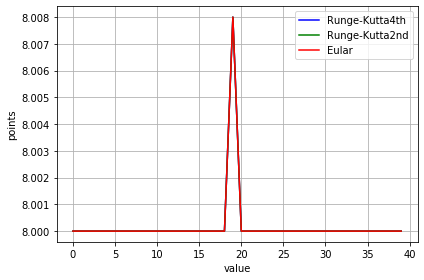

2
3
4
5
6
7
8
9
10
11
12
13


/Users/tsuchiyaken/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [8]:
#Runge-Kutta２次４次Eular法の結果の初動を色違いで同じグラフに重ねがけする．
#まずはdt=0.05としたものから
fig, ax = plt.subplots()
c1, c2, c3 = "blue", "green", "red"
l1, l2, l3 = "Runge-Kutta4th", "Runge-Kutta2nd", "Eular"
n = 0
for t in tpoints:
    if(n == 30):
        break
    ax.set_xlabel('value')
    ax.set_ylabel('points')
    ax.grid()
    print(n+1)
    ax.plot(x, Xr4[n], color=c1, label=l1)
    ax.plot(x, Xr2[n], color=c2, label=l2)
    ax.plot(x, Xe[n], color=c3, label=l3)
    ax.legend(loc=0)
    fig.tight_layout()
    plt.show()
    n  = n+1

In [ ]:
#3つの手法をdt = 0.05としてRMSEを出力する．
sample = 30


rmseR2005 = np.zeros(30)
rmseE005 = np.zeros(30)


X = np.full(K, F)
X[19] = F*1.001

Xr4 = np.empty((sample, K))
Xr2 = np.empty((sample, K))
Xe = np.empty((sample, K))
delta2 = np.empty(K)

tstart = 0.0
tend = sample*0.05
dt = 0.05
tpoints = np.arange(tstart, tend, dt)

Runge4(tpoints, X, Xr4)
Runge2(tpoints, X, Xr2)
Eular(tpoints, X, Xe)

x = np.arange(0, 30, 1)
for n in range(30):
    delta2 = np.square(Xr4[n] - Xr2[n])
    rmseR2005[n] = np.sqrt(np.sum(delta2)/K)
    delta2 = np.square(Xr4[n] - Xe[n])
    rmseE005[n] = np.sqrt(np.sum(delta2)/K)
  

fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Eular"
ax.set_ylabel('value')
ax.grid()
ax.plot(x, rmseR2005, color=c1, label=l1)
# ax.plot(x, rmseE, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()

fig, ax = plt.subplots()
c1, c2 = "blue",  "red"
l1, l2 = "Runge2nd", "Eular"
ax.set_ylabel('value')
ax.grid()
ax.plot(x, rmseR2005, color=c1, label=l1)
ax.plot(x, rmseE005, color=c2, label=l2)
ax.legend(loc=0)
fig.tight_layout()